
# Project: FBI NICS Firearm Background Check Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The FBIs National Instant Criminal Background Check System (NICS) is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data we work with comes from the FBI's
National Instant Criminal Background
Check System

National Instant Criminal Background Check System (NICS) Process

When a person tries to buy a firearm, the seller, known as a Federal Firearms Licensee (FFL), contacts NICS electronically or by phone. The prospective buyer fills out the ATF form, and the FFL relays that information to the NICS. The NICS staff performs a background check on the buyer. That background check verifies the buyer does not have a criminal record or isn't otherwise ineligible to purchase or own a firearm.

### Questions
- What census data is most associated with high gun per capita?  
- What is the overall trend of gun purchases?
- Which states have had the highest growth in gun registrations?

In [486]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [569]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
us_census_data = pd.read_csv('us_census_data.csv')
gun_data = pd.read_csv('gun-data.csv')

In [570]:
gun_data.shape, us_census_data.shape

((12485, 27), (85, 52))

In [571]:
us_census_data.head(100)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [572]:
us_census_data.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [573]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [574]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [575]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [576]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [577]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [578]:
# check for duplicates
us_census_data.duplicated().sum()

3

In [579]:
gun_data.duplicated().sum()

0

In [580]:
us_census_data.isnull().any().any(), us_census_data.isnull().any().sum()

(True, 52)

In [581]:
gun_data.isnull().any().any(), gun_data.isnull().any().sum()

(True, 23)

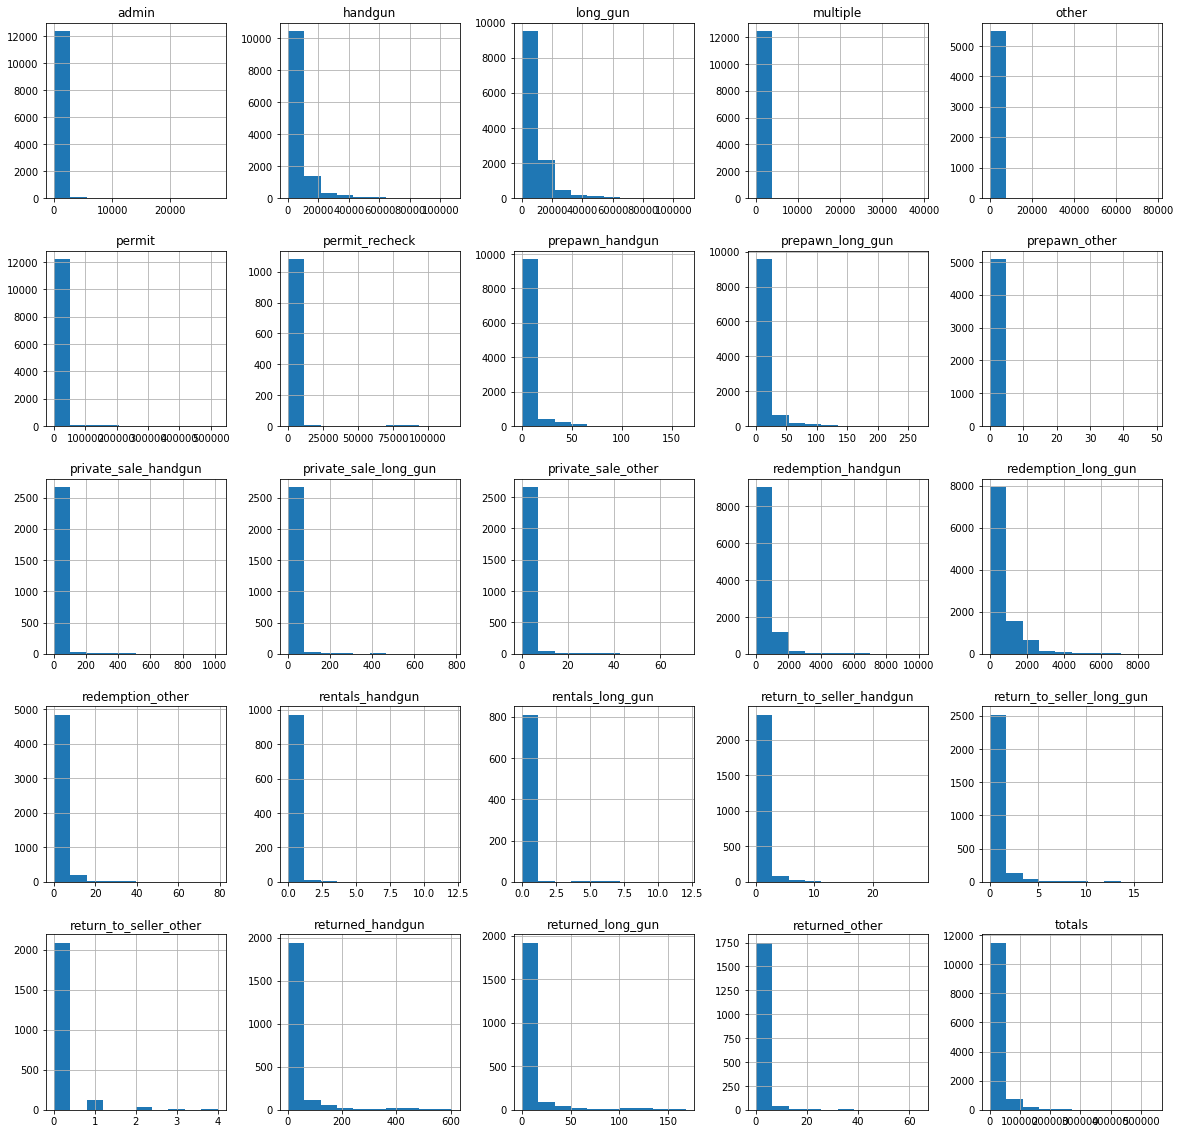

In [582]:
gun_data.hist(figsize=(20,20));

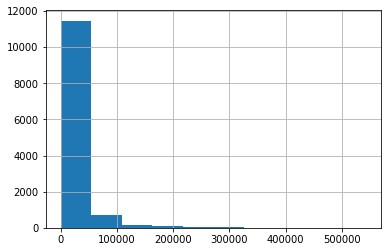

In [583]:
gun_data.totals.hist()

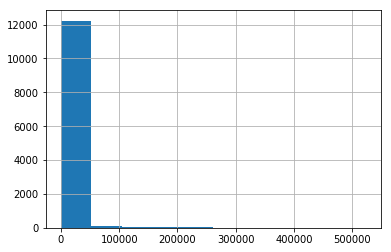

In [584]:
gun_data.permit.hist()

####  🌟 A quick overview shows that we have more guns in circulation than permitted 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [1264]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# making a copy not to test always from top
us_census_c = us_census_data.copy()
gun_data_c = gun_data.copy()

In [1265]:
gun_data_c.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [1266]:
us_census_c.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Cleaning Gun Data

In [1267]:
# removing data which is not needed 
gun_data_c.drop(['permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis=1, inplace=True)

In [1268]:
# checking if any column has NaN values
gun_data_c.isnull().any(), gun_data_c.isnull().any().sum()

(month     False
 state     False
 permit     True
 totals    False
 dtype: bool, 1)

In [1269]:
# filling NaN data with the mean value
gun_data_c.fillna(gun_data_c.mean(), inplace=True)

In [1270]:
# check if all NaN values are filled - should be 0
gun_data_c.isnull().any(), gun_data_c.isnull().any().sum()

(month     False
 state     False
 permit    False
 totals    False
 dtype: bool, 0)

In [1271]:
gun_data_c.head()

,month,state,permit,totals
0,2017-09,Alabama,16717.0,32019
1,2017-09,Alaska,209.0,6303
2,2017-09,Arizona,5069.0,28394
3,2017-09,Arkansas,2935.0,17747
4,2017-09,California,57839.0,123506


In [1272]:
# rename month to year
gun_data_c.rename(columns={'month': 'year'}, inplace=True)

In [1273]:
gun_data_c.head(1)

,year,state,permit,totals
0,2017-09,Alabama,16717.0,32019


In [1274]:
# slicing date only to year
gun_data_c['year'] = gun_data_c['year'].apply(lambda x: x[:4])

In [1275]:
gun_data_c.head()

,year,state,permit,totals
0,2017,Alabama,16717.0,32019
1,2017,Alaska,209.0,6303
2,2017,Arizona,5069.0,28394
3,2017,Arkansas,2935.0,17747
4,2017,California,57839.0,123506


#### Cleaning US Census Data

In [1276]:
us_census_c.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [1277]:
# drop colum
us_census_c = us_census_c.drop(columns = ['Fact Note'])

In [1278]:
us_census_c.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [1279]:
# transpose table
us_census_c = us_census_c.T

In [1280]:
us_census_c.head(1)

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z


In [1281]:
# rename header
us_census_c.rename(columns=us_census_c.iloc[0], inplace=True)
us_census_c.head(1)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z


In [1282]:
# remove first index row
us_census_c.drop(us_census_c.index[0], inplace=True)
us_census_c.head(2)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1283]:
us_census_c.index.name = 'state'
us_census_c.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
state,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1284]:
# rename the population header 2016 and 2010
us_census_c.rename(columns={'Population estimates, July 1, 2016,  (V2016)':'population_2016',
                              'Population estimates base, April 1, 2010,  (V2016)':'population_2010'}, inplace=True)

In [1285]:
# converting population values from string to int
us_census_c['population_2016'] = us_census_c['population_2016'].apply(lambda x: x.replace(",", "")).astype('int')

In [1286]:
us_census_c['population_2010'] = us_census_c['population_2010'].apply(lambda x: x.replace(",", "")).astype('int')

In [1287]:
# reset index to normalize the data
us_census_c.reset_index().head()

,state,population_2016,population_2010,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


#### Helper Functions


### What census data is most associated with high gun per capita?

In [1496]:
# helper function 
def drawPlotBar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.bar(x, y)
    plt.xticks(x, rotation='vertical')
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(title, fontsize=22)
    plt.show()
    

In [1446]:
# copy of us census data and gund data
us_census_first = us_census_c.copy()
gun_data_first = gun_data_c.copy()

In [1447]:
gun_data_first.head(1)

,year,state,permit,totals
0,2017,Alabama,16717.0,32019


In [1448]:
gun_data_first.head()

,year,state,permit,totals
0,2017,Alabama,16717.0,32019
1,2017,Alaska,209.0,6303
2,2017,Arizona,5069.0,28394
3,2017,Arkansas,2935.0,17747
4,2017,California,57839.0,123506


In [1449]:
# grouping columns by state, year and summing totals
gun_data_group = gun_data_first.groupby([gun_data_first['state'], gun_data_first['year']])['totals'].sum().reset_index()


In [1450]:
# not full year data for 1998 and 2017 
gun_data_group = gun_data_group[(gun_data_group['year'] != '1998') & (gun_data_group['year'] != '1999') & (gun_data_group['year'] != '2017')]
gun_data_group.head()

,state,year,totals
2,Alabama,2000,221911
3,Alabama,2001,230187
4,Alabama,2002,221008
5,Alabama,2003,225479
6,Alabama,2004,229997


In [1451]:
gun_data_group.head()

,state,year,totals
2,Alabama,2000,221911
3,Alabama,2001,230187
4,Alabama,2002,221008
5,Alabama,2003,225479
6,Alabama,2004,229997


In [1452]:
us_census_first = us_census_first[['population_2010', 'population_2016']]
us_census_first.head()

,population_2010,population_2016
state,,
Alabama,4780131,4863300
Alaska,710249,741894
Arizona,6392301,6931071
Arkansas,2916025,2988248
California,37254522,39250017


In [1453]:
gun_data_10 = gun_data_group[gun_data_group['year'] == '2010'].set_index('state')
gun_data_16 = gun_data_group[gun_data_group['year'] == '2016'].set_index('state')


In [1454]:
gun_data_10.head()

,year,totals
state,,
Alabama,2010,308607
Alaska,2010,65909
Arizona,2010,206050
Arkansas,2010,191448
California,2010,816399


In [1455]:
 gun_data_16.head()

,year,totals
state,,
Alabama,2016,616947
Alaska,2016,87647
Arizona,2016,416279
Arkansas,2016,266014
California,2016,2377167


In [1456]:
# merging data from 2010 and 2016 over the state index and dropping year columns
merged_data_10_16 = pd.merge(gun_data_10, gun_data_16, how='left', on='state').drop(columns=['year_x', 'year_y'])
merged_data_10_16.head()

,totals_x,totals_y
state,,
Alabama,308607,616947
Alaska,65909,87647
Arizona,206050,416279
Arkansas,191448,266014
California,816399,2377167


In [1457]:
merged_data_10_16.columns = ['total_gun_2010', 'total_gun_2016']

In [1458]:
merged_data_10_16.head()

,total_gun_2010,total_gun_2016
state,,
Alabama,308607,616947
Alaska,65909,87647
Arizona,206050,416279
Arkansas,191448,266014
California,816399,2377167


In [1459]:
merged_data = pd.concat([merged_data_10_16, us_census_first], axis=1, sort=False)
merged_data.head()

,total_gun_2010,total_gun_2016,population_2010,population_2016
Alabama,308607,616947,4780131.0,4863300.0
Alaska,65909,87647,710249.0,741894.0
Arizona,206050,416279,6392301.0,6931071.0
Arkansas,191448,266014,2916025.0,2988248.0
California,816399,2377167,37254522.0,39250017.0


In [1460]:
# calculating the gun per capita
merged_data['checkPerCapity_2010'] = round(merged_data['total_gun_2010'] / merged_data['population_2010'], 2)
merged_data['checkPerCapity_2016'] = round(merged_data['total_gun_2010'] / merged_data['population_2016'], 2)

In [1461]:
# giving a name for the index
merged_data.index.name = 'state'

In [1462]:
merged_data = merged_data.reset_index()

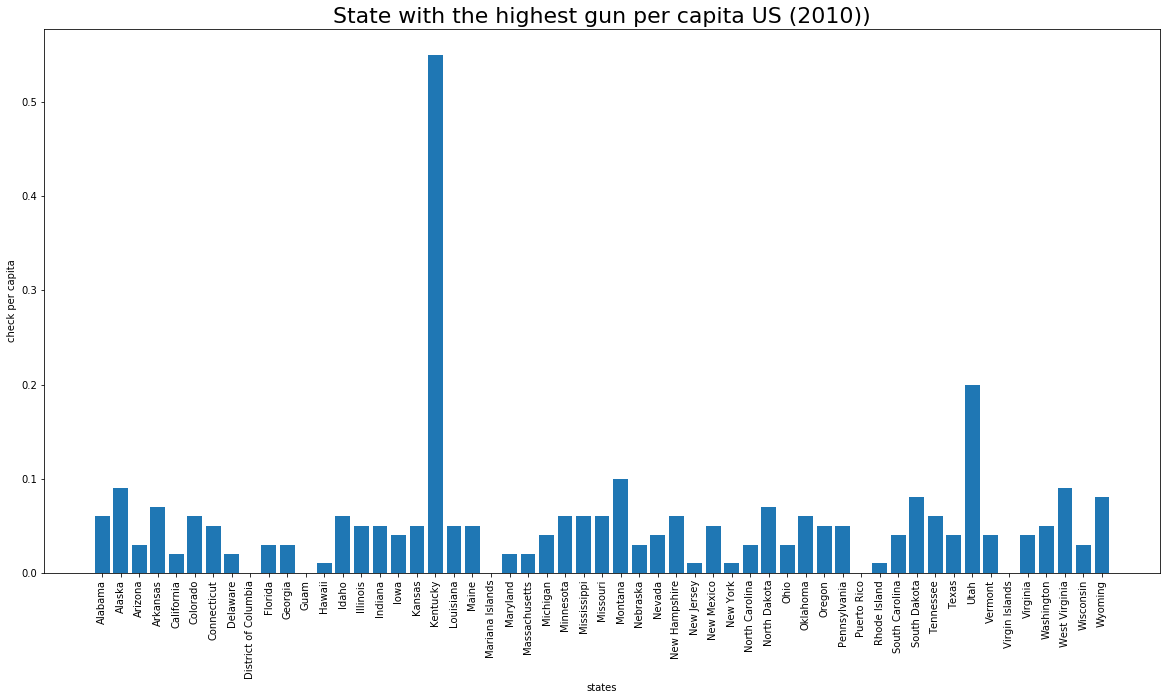

In [1464]:
drawPlotBar(merged_data['state'], merged_data['checkPerCapity_2010'], 
         'State with the highest gun per capita US (2010))', 'states', 'check per capita' )

🌟 The US state kentucky has the highest gun check per capita. The reason could be the different laws in the states. 

### What is the overall trend of gun purchases?

In [1497]:
# helper function
def drawMultiChart(data, data2, title, x_label, y_label, label_data, label_data2):
    plt.figure(figsize=(12,6))
    plt.title(title)
    plt.plot(data2, label=label_data)  
    plt.plot(data, linestyle='dashed', label=label_data2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left')   

In [1498]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# all legal weapons

In [1499]:
#make a fresh copy of the data / c for cleaned data
gun_data_second = gun_data_c.copy()

In [1500]:
gun_data_second.head()

,year,state,permit,totals
0,2017,Alabama,16717.0,32019
1,2017,Alaska,209.0,6303
2,2017,Arizona,5069.0,28394
3,2017,Arkansas,2935.0,17747
4,2017,California,57839.0,123506


In [1501]:
#calculating the permitted guns
permited_number_weapons = gun_data_second.groupby('year')['permit'].sum()

In [1502]:
permited_number_weapons = permited_number_weapons.reset_index()

In [1503]:
permited_number_weapons.head()

,year,permit
0,1998,8.458263e+04
1,1999,1.082595e+06
2,2000,1.227814e+06
3,2001,1.408338e+06
4,2002,1.363211e+06


In [1504]:
total_number_weapons = gun_data_second.groupby('year')['totals'].sum()
total_number_weapons = total_number_weapons.reset_index()

In [1505]:
total_number_weapons.head()

,year,totals
0,1998,891898
1,1999,9043747
2,2000,8427096
3,2001,8820045
4,2002,8367069


In [1506]:
permited_number_weapons = permited_number_weapons.set_index('year')
permited_number_weapons.head()

,permit
year,
1998,8.458263e+04
1999,1.082595e+06
2000,1.227814e+06
2001,1.408338e+06
2002,1.363211e+06


In [1507]:
total_number_weapons = total_number_weapons.set_index('year')
total_number_weapons.head()

,totals
year,
1998,891898
1999,9043747
2000,8427096
2001,8820045
2002,8367069


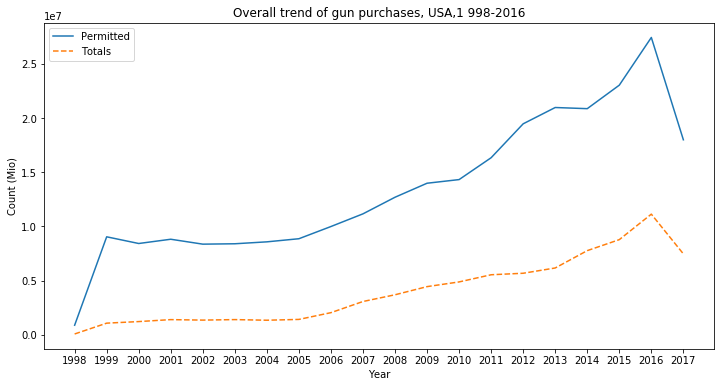

In [1509]:
drawMultiChart(permited_number_weapons, total_number_weapons, 'Overall trend of gun purchases, USA,1 998-2016', 'Year', 'Count (Mio)', 'Permitted', 'Totals')


🌟 The permitted and the overall purchaded weapons increased from 1998 to 2016 constantly. One reason can be the terrorism in the past in the US and outside the US. Another point could be the crimes such as organized crimes, gangs, etc.. and last but not least it could be a combination of it. But it is also worth mentioning that the gun business is a lucrative business and in some states in the US it is easy to get a gun

### Which states have had the highest growth in gun registrations?

In [1511]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
gun_data_third = gun_data_c.copy()

In [1513]:
# group the data by state
gun_data_third = gun_data_third.groupby(['state'])['totals'].sum()

In [1516]:
gun_data_third = gun_data_third.reset_index()

In [1517]:
gun_data_third.head()

,state,totals
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


In [1519]:
gun_data_third = gun_data_third.sort_values(by='totals', ascending=False)[:10]

In [1520]:
gun_data_third.head()

,state,totals
18,Kentucky,29762434
46,Texas,19435186
4,California,19014063
14,Illinois,15471534
40,Pennsylvania,13133876


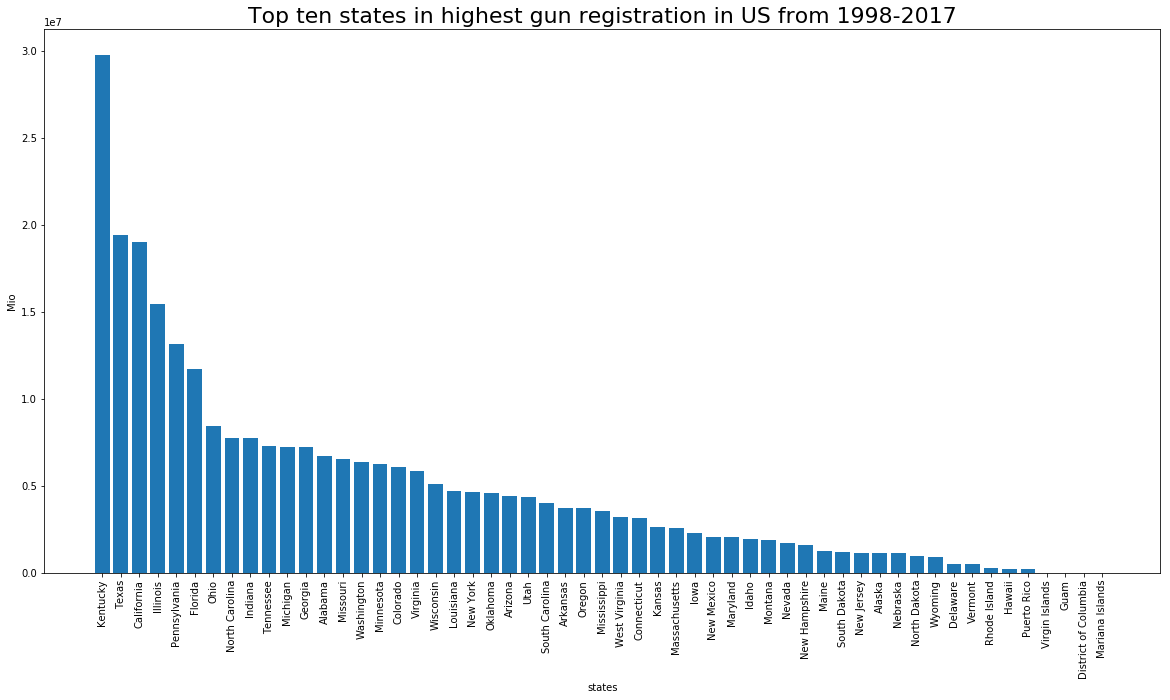

In [1523]:
drawPlotBar(gun_data_third['state'], gun_data_third['totals'], 'Top ten states in highest gun registration in US from 1998-2017', 'states', 'Mio')


In [1525]:
# proof that kentucky has the highest registered guns
gun_data_third.loc[gun_data_third['totals'].idxmax()]

state     Kentucky
totals    29762434
Name: 18, dtype: object

🌟 The highest growth in gun registration is Kentucky. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Overall the gun registration increased from 1998 to 2017. Kentucky has the highest growth in gun 
registration followed by the countries Texas and California